<a href="https://colab.research.google.com/github/playinpixel/secure_comm_in_ethical_iot/blob/main/DetectingIndianSignPresence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics


image 1/1 /content/first.png: 480x640 1 traffic_sign, 1113.2ms
Speed: 3.9ms preprocess, 1113.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


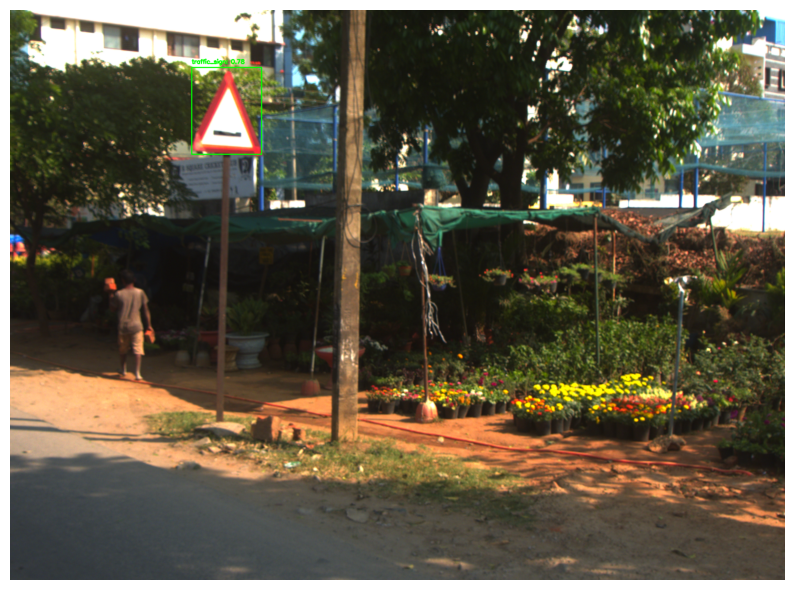


image 1/1 /content/second.png: 480x640 1 traffic_sign, 1832.3ms
Speed: 5.2ms preprocess, 1832.3ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


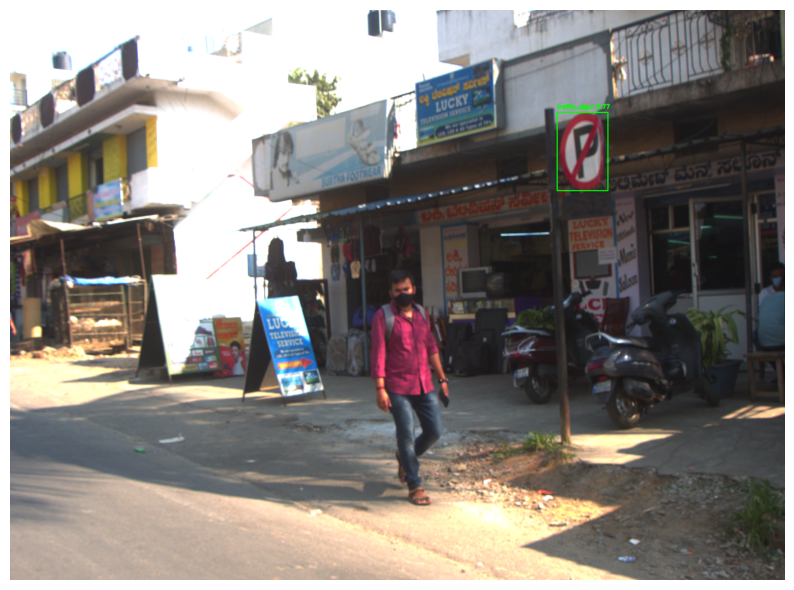


image 1/1 /content/third.png: 480x640 1 traffic_sign, 1364.1ms
Speed: 5.1ms preprocess, 1364.1ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


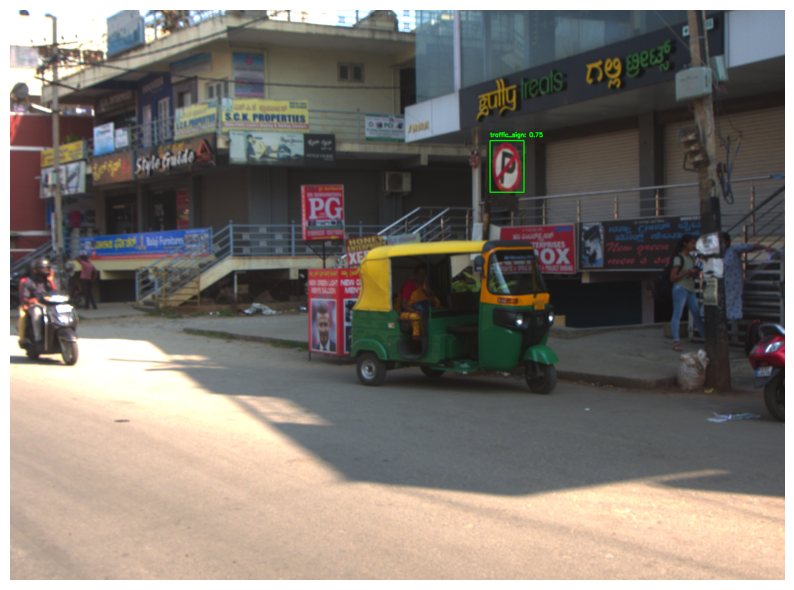


image 1/1 /content/fourth.png: 480x640 1 traffic_sign, 1218.0ms
Speed: 6.4ms preprocess, 1218.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


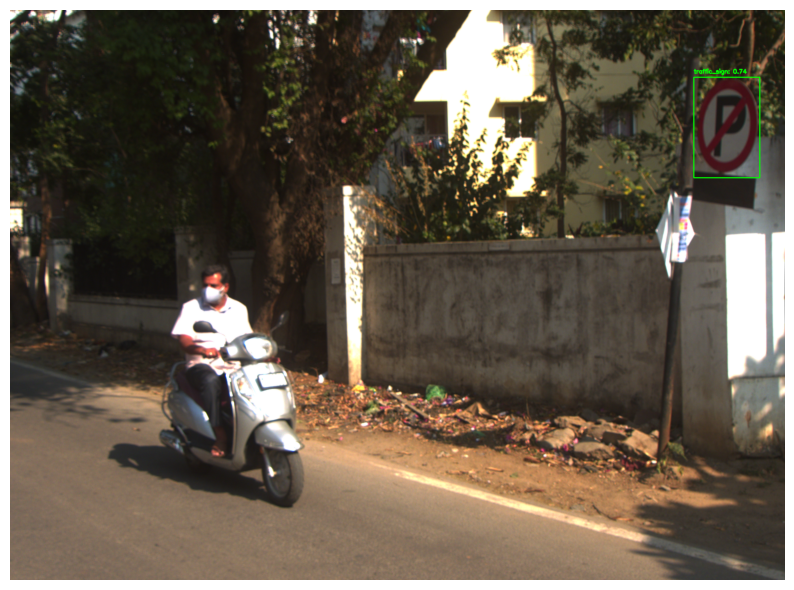


image 1/1 /content/fifth.png: 480x640 (no detections), 1244.1ms
Speed: 5.1ms preprocess, 1244.1ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


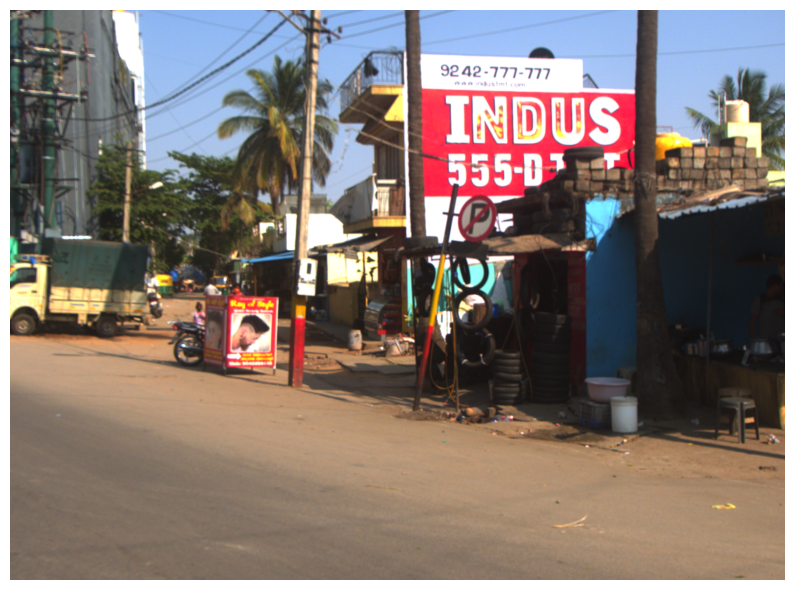

In [8]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

# Load a model
#model = YOLO("yolov8n.pt")  # load an official model
model = YOLO("best.pt")  # load a custom model
image_paths = ["/content/first.png","/content/second.png", "/content/third.png","/content/fourth.png","/content/fifth.png"]

for image_path in image_paths:
  # Predict with the model
  results = model(image_path)  # predict on an image

  # Extract the image and the bounding boxes

  image = cv2.imread(image_path)

  # Loop through the results to draw the bounding boxes
  for result in results:
      boxes = result.boxes.xyxy.cpu().numpy()  # Bounding box coordinates
      confidences = result.boxes.conf.cpu().numpy()  # Confidence scores
      class_ids = result.boxes.cls.cpu().numpy()  # Class IDs

      for box, conf, class_id in zip(boxes, confidences, class_ids):
          x1, y1, x2, y2 = map(int, box)
          label = f'{result.names[int(class_id)]}: {conf:.2f}'

          # Draw the bounding box
          cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
          # Add the label to the bounding box
          cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

  # Convert BGR image to RGB for matplotlib
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  # Display the image with bounding boxes
  plt.figure(figsize=(10, 10))
  plt.imshow(image_rgb)
  plt.axis('off')
  plt.show()
